In [5]:
import numpy as np
import random
import math
from math import exp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from logres import lin_model, MCMC
from logres import MCMC as lin_MCMC
from Bayesneuralnet_regcls import Network, scikit_linear_mod
from Bayesneuralnet_regcls import MCMC as nn_MCMC
from convergence_GR import gelman_rubin

In [2]:
def squared_error(prediction, actual):
    return (
        np.sum(np.square(prediction - actual)) / prediction.shape[0]
    ) 

In [56]:
def accuracy(prediction, actual):
    count = 0
    for i in range(prediction.shape[0]):
        if prediction[i] == actual[i]:
            count += 1
    return 100 * count/prediction.shape[0]


# Lazer

### Bayesian linear regression

In [3]:
traindata = np.loadtxt("data/Lazer/train.txt")
testdata = np.loadtxt("data/Lazer/test.txt") 
topology = [4, 1]

In [26]:
# load the trained weights
pos_run1 = np.loadtxt('result/Lazer/linreg_pos_w_0.txt')
pos_run2 = np.loadtxt('result/Lazer/linreg_pos_w_1.txt')  
pos_run3 = np.loadtxt('result/Lazer/linreg_pos_w_2.txt')  
pos_run4 = np.loadtxt('result/Lazer/linreg_pos_w_3.txt')  
pos_run5 = np.loadtxt('result/Lazer/linreg_pos_w_4.txt') 

data = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

print('gelman rubin - linreg')
gelman_rubin(data)


gelman rubin - linreg
[1.19174701 1.24116768 1.28847179 1.17956742 1.05182397]  Rhat


array([1.19174701, 1.24116768, 1.28847179, 1.17956742, 1.05182397])

In [5]:
lin_model_lazer = lin_model(0, traindata, testdata, topology[0], 0.1, False)
mse = np.empty(5)

for i in range(5):
   mse[i] = squared_error(lin_model_lazer.evaluate_proposal(testdata, data[i].mean(axis=0)), testdata[:, -1])
   
print('linreg mse: ', round(mse.mean(), 10))



linreg rmse:  0.004889619


In [6]:
pos_run1_bnn = np.loadtxt('result/Lazer/pos_w_0.txt')
pos_run2_bnn = np.loadtxt('result/Lazer/pos_w_1.txt')  
pos_run3_bnn = np.loadtxt('result/Lazer/pos_w_2.txt')  
pos_run4_bnn = np.loadtxt('result/Lazer/pos_w_3.txt')  
pos_run5_bnn = np.loadtxt('result/Lazer/pos_w_4.txt') 

data_bnn = np.array([pos_run1_bnn, pos_run2_bnn, pos_run3_bnn, pos_run4_bnn, pos_run5_bnn])


In [7]:
print('gelman rubin - bnn')
gelman_rubin(data_bnn)

gelman rubin - bnn
[  35.64097006   17.89683348   56.75749985  177.38537506   90.87449154
   48.60053278   43.24963566   75.2307735    50.03944911   58.66598333
  277.48017804  153.54687504  760.86929398  341.94615367  460.24135108
  143.94030999 2164.55018384 1759.39156423   70.01724336 1474.54767987
  134.71537296 1311.36520033  633.20814647  539.11945077  998.84513776
   51.81001478   19.42680461  133.56345436  103.84990531    7.5747017
  394.812546  ]  Rhat


array([  35.64097006,   17.89683348,   56.75749985,  177.38537506,
         90.87449154,   48.60053278,   43.24963566,   75.2307735 ,
         50.03944911,   58.66598333,  277.48017804,  153.54687504,
        760.86929398,  341.94615367,  460.24135108,  143.94030999,
       2164.55018384, 1759.39156423,   70.01724336, 1474.54767987,
        134.71537296, 1311.36520033,  633.20814647,  539.11945077,
        998.84513776,   51.81001478,   19.42680461,  133.56345436,
        103.84990531,    7.5747017 ,  394.812546  ])

In [18]:
bnn_model_lazer = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
mse_bnn = np.empty(5)

for i in range(5):
    temp_fx, temp_prob = bnn_model_lazer.evaluate_proposal(testdata, data_bnn[i].mean(axis=0))
    mse_bnn[i] = squared_error(temp_fx, testdata[:, -1])
    
print('bnn mse: ', round(mse_bnn.mean(), 10))



bnn rmse:  0.0186435351


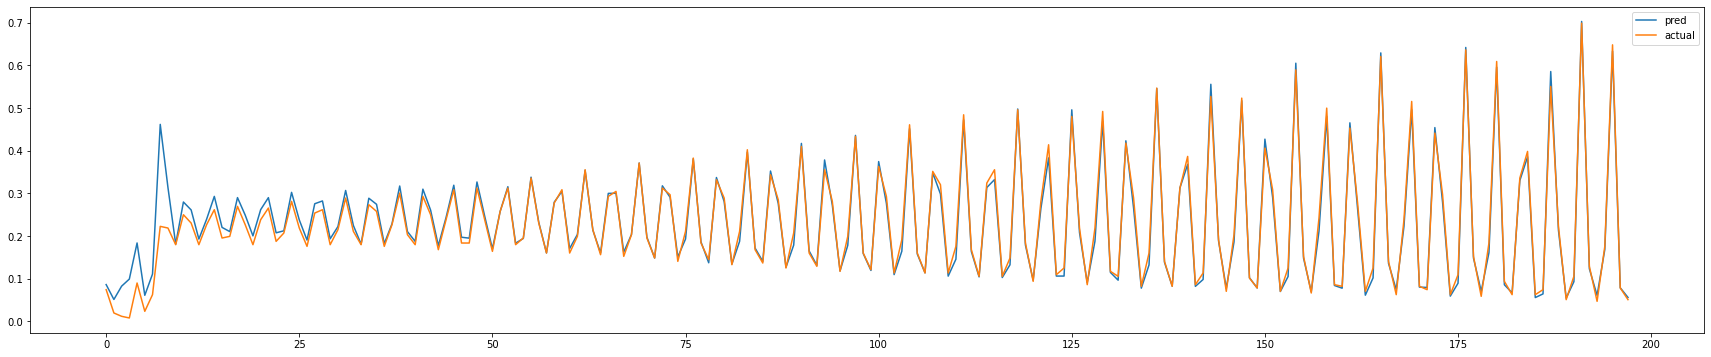

<Figure size 432x288 with 0 Axes>

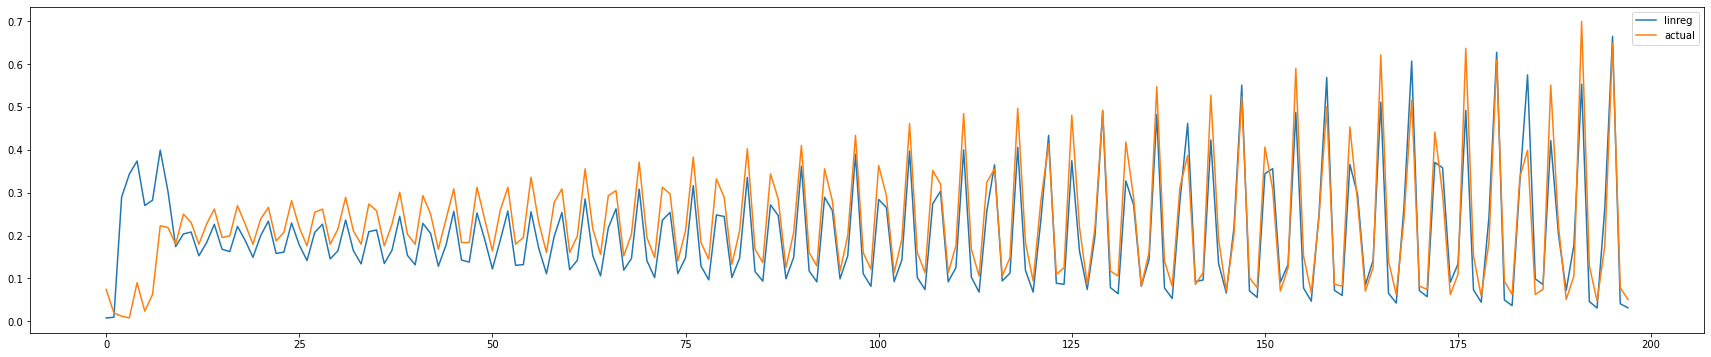

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(30,6))
plt.plot(temp_fx, label = 'pred')
plt.plot(testdata[:, -1], label = 'actual')
plt.legend()
plt.show()
plt.clf()

plt.figure(figsize=(30,6))
plt.plot(lin_model_lazer.evaluate_proposal(testdata, data[i].mean(axis=0)), label='linreg')
plt.plot(testdata[:, -1], label = 'actual')
plt.legend()
plt.show()
plt.clf()


# Sunspot

In [38]:
traindata = np.loadtxt("data/Sunspot/train.txt")
testdata = np.loadtxt("data/Sunspot/test.txt") 
topology = [4, 1]

In [39]:
# load the trained weights
pos_run1 = np.loadtxt('result/Sunspot/linreg_pos_w_0.txt')
pos_run2 = np.loadtxt('result/Sunspot/linreg_pos_w_1.txt')  
pos_run3 = np.loadtxt('result/Sunspot/linreg_pos_w_2.txt')  
pos_run4 = np.loadtxt('result/Sunspot/linreg_pos_w_3.txt')  
pos_run5 = np.loadtxt('result/Sunspot/linreg_pos_w_4.txt') 

data = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

print('gelman rubin - linreg')
gelman_rubin(data)

gelman rubin - linreg
[1.93354993 2.78153699 2.35139793 1.41603986 1.00226955]  Rhat


array([1.93354993, 2.78153699, 2.35139793, 1.41603986, 1.00226955])

In [40]:
lin_model_sunspot = lin_model(0, traindata, testdata, topology[0], 0.1, False)
mse = np.empty(5)

for i in range(5):
   mse[i] = squared_error(lin_model_sunspot.evaluate_proposal(testdata, data[i].mean(axis=0)), testdata[:, -1])
   

print('linreg mse: ', round(mse.mean(), 10))

linreg mse:  0.0012832341


In [30]:
pos_run1_bnn = np.loadtxt('result/Sunspot/pos_w_0.txt')
pos_run2_bnn = np.loadtxt('result/Sunspot/pos_w_1.txt')  
pos_run3_bnn = np.loadtxt('result/Sunspot/pos_w_2.txt')  
pos_run4_bnn = np.loadtxt('result/Sunspot/pos_w_3.txt')  
pos_run5_bnn = np.loadtxt('result/Sunspot/pos_w_4.txt') 

data_bnn = np.array([pos_run1_bnn, pos_run2_bnn, pos_run3_bnn, pos_run4_bnn, pos_run5_bnn])

In [31]:
print('gelman rubin - bnn')
gelman_rubin(data_bnn)

gelman rubin - bnn
[167.83878437  38.57523849  63.92776901 132.21830682   8.37783528
 165.74077152  22.19472072  20.69348706  68.86812541  40.97752025
 145.92593111  96.33558519  75.96949095 635.70218139 115.16437684
 152.33541696 287.04597097 215.7746704  135.43100796 156.17664544
 161.04780493 820.74307722  31.77084623 855.68533154 308.59570643
 259.49895969 145.47991658 242.95720984 332.94998431 393.32119139
 138.62425411]  Rhat
[120.28110532  28.78664523  46.69797782  94.49418044   7.31672374
 118.71660212  17.26579985  16.27882985  50.17377118  30.87988844
 104.26319095  69.36666588  55.30973153 446.99343339  82.69560834
 108.81677038 202.95378178 152.615807    96.79340909 111.32783416
 114.88874808 576.8504205   23.56225263 601.74560901 217.62370613
 183.50557747 103.98903845 172.29881742 234.48786305 277.13018427
  99.35935597]  Rhat


array([120.28110532,  28.78664523,  46.69797782,  94.49418044,
         7.31672374, 118.71660212,  17.26579985,  16.27882985,
        50.17377118,  30.87988844, 104.26319095,  69.36666588,
        55.30973153, 446.99343339,  82.69560834, 108.81677038,
       202.95378178, 152.615807  ,  96.79340909, 111.32783416,
       114.88874808, 576.8504205 ,  23.56225263, 601.74560901,
       217.62370613, 183.50557747, 103.98903845, 172.29881742,
       234.48786305, 277.13018427,  99.35935597])

In [23]:
bnn_model_sunspot = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
mse_bnn = np.empty(5)

for i in range(5):
    temp_fx, temp_prob = bnn_model_sunspot.evaluate_proposal(testdata, data_bnn[i].mean(axis=0))
    mse_bnn[i] = squared_error(temp_fx, testdata[:, -1])
    
print('bnn mse: ', round(mse_bnn.mean(), 10))


bnn mse:  0.0001883603


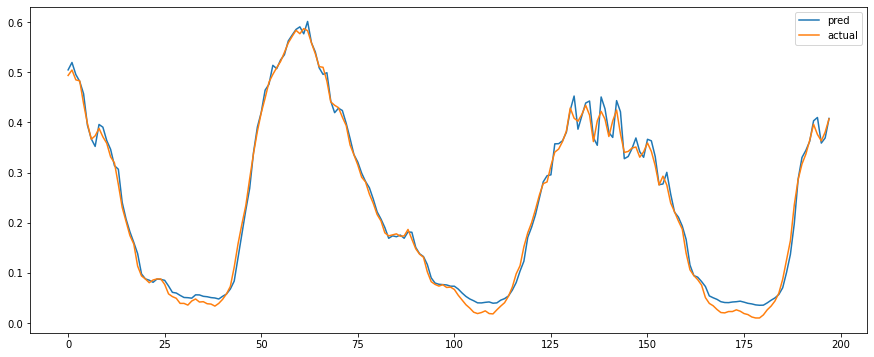

<Figure size 432x288 with 0 Axes>

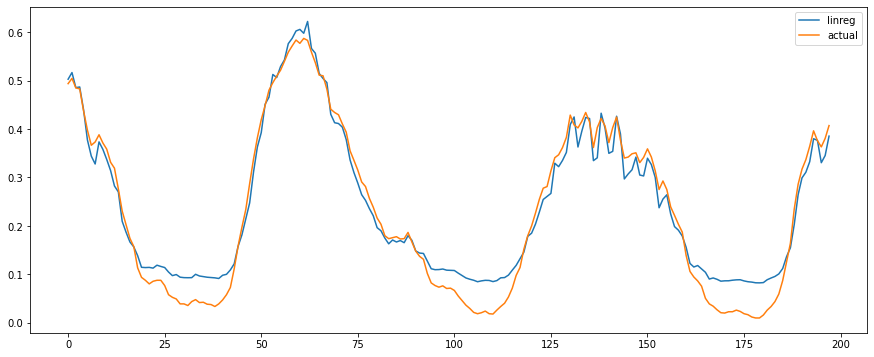

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(15,6))
plt.plot(temp_fx, label = 'pred')
plt.plot(testdata[:, -1], label = 'actual')
plt.legend()
plt.show()
plt.clf()

plt.figure(figsize=(15,6))
plt.plot(lin_model_lazer.evaluate_proposal(testdata, data[i].mean(axis=0)), label='linreg')
plt.plot(testdata[:, -1], label = 'actual')
plt.legend()
plt.show()
plt.clf()


# Iris

In [41]:
data  = np.genfromtxt('data/iris.csv',delimiter=';')
classes = data[:,4].reshape(data.shape[0],1)-1
features = data[:,0:4] #Normalizing Data

for k in range(4):
    mean = np.mean(features[:,k])
    dev = np.std(features[:,k])
    features[:,k] = (features[:,k]-mean)/dev
    train_ratio = 0.7 #choose
    indices = np.random.permutation(features.shape[0])
    traindata = np.hstack([features[indices[:np.int(train_ratio*features.shape[0])],:],classes[indices[:np.int(train_ratio*features.shape[0])],:]])
    testdata = np.hstack([features[indices[np.int(train_ratio*features.shape[0])]:,:],classes[indices[np.int(train_ratio*features.shape[0])]:,:]])
    activation = True
    
topology = [4, 1]

In [79]:
# load the trained weights
pos_run1 = np.loadtxt('result/Iris/linreg_pos_w_0.txt')
pos_run2 = np.loadtxt('result/Iris/linreg_pos_w_1.txt')  
pos_run3 = np.loadtxt('result/Iris/linreg_pos_w_2.txt')  
pos_run4 = np.loadtxt('result/Iris/linreg_pos_w_3.txt')  
pos_run5 = np.loadtxt('result/Iris/linreg_pos_w_4.txt') 

data = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

print('gelman rubin - linreg')
print(np.sum(gelman_rubin(data) < 1.1, axis = 0))

gelman rubin - linreg
[ 1.00177039  1.00151383  1.0047393   1.00570279  1.00053893 10.58369633
  3.98818839]  Rhat
5


In [63]:
lin_model_iris = lin_model(0, traindata, testdata, topology[0], 0.1, True)
acc = np.empty(5)

for i in range(5):
   acc[i] = accuracy(np.rint(lin_model_iris.evaluate_proposal(testdata, data[i].mean(axis=0))), testdata[:, -1])
   

print('linreg mse: ', round(acc.mean(), 3), '%')

linreg mse:  98.077 %


In [99]:
pos_run1_bnn = np.loadtxt('result/Iris/pos_w_0.txt')
pos_run2_bnn = np.loadtxt('result/Iris/pos_w_1.txt')  
pos_run3_bnn = np.loadtxt('result/Iris/pos_w_2.txt')  
pos_run4_bnn = np.loadtxt('result/Iris/pos_w_3.txt')  
pos_run5_bnn = np.loadtxt('result/Iris/pos_w_4.txt') 

data_bnn = np.array([pos_run1_bnn, pos_run2_bnn, pos_run3_bnn, pos_run4_bnn, pos_run5_bnn])

In [100]:
print(np.sum(gelman_rubin(data_bnn) < 1.1, axis = 0))
print(gelman_rubin(data_bnn).shape)

[  1.06930707  14.95487155  27.98143472   6.00207244  11.48038469
   8.31407858   6.13162546   7.66704728  31.05122709  29.83555331
   8.20039279   2.36137439  45.81772345   5.19785134   3.56949537
   1.99809075  11.90173524   1.52717872  11.69630912  16.78966863
  30.28558687   2.50073766  10.71903273  10.03493333   7.40708457
  47.48958635  14.32142206  14.30406732  20.55700171  10.81576566
   8.36373368  21.49809519   1.91666368  14.08547448  35.75351692
   7.15550033   4.91270746  18.91032537  15.47608524  25.34249189
 102.21925778  17.98812363  16.0201632   24.58558037  21.9018303
  11.75383884  16.95949529  13.190218    40.83412704   3.59152394
   4.5503513    9.37633377  25.92773413  60.47151229   4.75167276
   1.29952537   9.14820081  18.93481842  23.53056922   7.48030185
  23.60278822  18.47908269  20.79921786  19.69844567  49.98329049
  48.85701837  27.9103992   20.48253845   9.01233089  10.09539349
  32.82515639  58.98305132  12.56743228  14.61256981  12.46736617
  12.698593

In [77]:
bnn_model_iris = Network([4, 12, 3], traindata, testdata, 0.01, 'classification')
acc_bnn = np.empty(5)


for i in range(5):
    temp_fx, temp_prob = bnn_model_iris.evaluate_proposal(testdata, data_bnn[i].mean(axis=0))
    acc_bnn[i] = accuracy(temp_fx, testdata[:, -1])
    
print('bnn acc: ', round(acc_bnn.mean(), 3), '%')


bnn acc:  97.692 %


# Ionosphere

In [86]:
traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]
topology = [34, 2]

In [3]:
# load the trained weights
pos_run1 = np.loadtxt('result/Ionosphere/linreg_pos_w_0.txt')
pos_run2 = np.loadtxt('result/Ionosphere/linreg_pos_w_1.txt')  
pos_run3 = np.loadtxt('result/Ionosphere/linreg_pos_w_2.txt')  
pos_run4 = np.loadtxt('result/Ionosphere/linreg_pos_w_3.txt')  
pos_run5 = np.loadtxt('result/Ionosphere/linreg_pos_w_4.txt') 

data = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

print('gelman rubin - linreg')
print(np.sum(gelman_rubin(data) < 1.1, axis = 0))

gelman rubin - linreg
[1.01163415 4.05247841 1.0632517  1.04889994 1.02292079 1.05399461
 1.02280023 1.00735723 1.04499128 1.02813033 1.02965393 1.02298868
 1.07647553 1.06703633 1.07015928 1.0573302  1.06403764 1.02947426
 1.12669164 1.03417269 1.01801087 1.01429649 1.02760541 1.02188138
 1.04287866 1.03318328 1.06085663 1.02781248 1.02188846 1.0207723
 1.02136437 1.01196906 1.06591595 1.0619136  1.02589879 4.54998463]  Rhat
33


In [88]:
lin_model_ionosphere = lin_model(0, traindata, testdata, topology[0], 0.1, True)
acc = np.empty(5)

for i in range(5):
   acc[i] = accuracy(np.rint(lin_model_ionosphere.evaluate_proposal(testdata, data[i].mean(axis=0))), testdata[:, -1])
   

print('linreg mse: ', round(acc.mean(), 3), '%')

linreg mse:  89.174 %


In [4]:
pos_run1_bnn = np.loadtxt('result/Ionosphere/pos_w_0.txt')
pos_run2_bnn = np.loadtxt('result/Ionosphere/pos_w_1.txt')  
pos_run3_bnn = np.loadtxt('result/Ionosphere/pos_w_2.txt')  
pos_run4_bnn = np.loadtxt('result/Ionosphere/pos_w_3.txt')  
pos_run5_bnn = np.loadtxt('result/Ionosphere/pos_w_4.txt') 

data_bnn = np.array([pos_run1_bnn, pos_run2_bnn, pos_run3_bnn, pos_run4_bnn, pos_run5_bnn])

In [5]:
print(np.sum(gelman_rubin(data_bnn) < 1.1, axis = 0))
print(gelman_rubin(data_bnn).shape)

[ 3.84436224 25.72654746 22.43359875 ...  8.36151172 16.06274081
 17.9338533 ]  Rhat
0
[ 3.84436224 25.72654746 22.43359875 ...  8.36151172 16.06274081
 17.9338533 ]  Rhat
(1852,)


In [98]:
bnn_model_iris = Network([34, 50, 2], traindata, testdata, 0.01, 'classification')
acc_bnn = np.empty(5)

for i in range(5):
    temp_fx, temp_prob = bnn_model_iris.evaluate_proposal(testdata, data_bnn[i].mean(axis=0))
    acc_bnn[i] = accuracy(temp_fx, testdata[:, -1])
    
print('bnn acc: ', round(acc_bnn.mean(), 3), '%')

bnn acc:  93.761 %


# Summary
---
All results are based on the average results of 5 independently trained models.

(Gelman & Rubin, 1992) $\sqrt{\hat{R}} = \sqrt{(\frac{n-1}{n} + \frac{m+1}{mn}\frac{B}{W}) \frac{df}{df-2}}$

|  Problem                      | testdata MSE/accuracy (linreg) | testdata MSE/accuracy (BNN)    | number of weights with $\hat{R} < 1.1$ (linreg) | number of weights with $\hat{R} < 1.1$ (BNN) | 
| ---                           | :---:                          |   :---:       | :---: |  :---: |
| Lazer (regression)            | 0.004889619                    | 0.0006183606  | 1/5   | 0/31   |
| Sunspot (regression)          | 0.0012832341                   | 0.0001883603  | 1/5   | 0/31   |
| Iris (classification)         | 98.077 %                       | 97.692 %      | 5/7   | 1/99   |
| Ionosphere (classification)   | 89.174 %                       | 93.761 %      | 33/34 | 0/1852 |



Using a sample size of 50000, in the cases of Bayesian linear regression, most weights give very small $\hat{R}$. For example, in the Lazer and Sunspot problem, although only one of the weights give a value of less than 1.1, the other values are still relatively small (all of which are less than 1.3). On the other hand, while the Bayesian neural network performs better in predicting the results, as shown by a smaller MSE, the $\hat{R}$ value is much larger for all weights, as there is only one value less than ten, and most values are larger than 100. This is also the case for all other problems.